### Feature Engineering for Dataset

**TF-IDF (Term Frequency - Inverse Document Frequency)**
- A handy algorithm that uses the frequency of words to determine how relevant those words are to a given document. 
- Convert text documents into vectors based on the relevancy of the word
- Based on the bag of the words model
- Create a matrix containing the information about less & most relevant words in the document
                            Formula: TF-IDF = TF(t,d) * IDF(t)  

In [2]:
# convert text into vectors showing relevancy of words
from sklearn.feature_extraction.text import TfidfVectorizer

# Calculate the highest TF-IDF for 2500 words
cv = TfidfVectorizer(max_features = 2500)

### Classification Algorithms

**1. Logistic Regression**   

Source code ref: [here](https://www.geeksforgeeks.org/amazon-product-reviews-sentiment-analysis-in-python/)  

- Predicts a categorical output using a given set of independent variables e.g. 0/1, yes/no
- Used to solve classification problems
- We find the S-curve (sigmoid function)
- Estimation of accuracy is maximum likelihood estimation
- Does not require linear relationship
- There should not be collinearity between features

In [24]:
# load the data batch
import pandas as pd
df2 = pd.read_csv('C:/Users/yippe/OneDrive/Documents/Data/Amazon_Reviews/batch_reviews_textprep.csv')
df2.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,Compound,Sentiment,Rating
0,US,42521656.0,R26MV8D0KG6QI6,B000SAQCWC,159713740,"The Cravings Place Chocolate Chunk Cookie Mix,...",Grocery,5.0,0.0,0.0,N,Y,Using these for years - love them.,family allergic wheat dairy egg nuts several t...,2015-08-31,0.8096,Positive,1.0
1,US,12049833.0,R1OF8GP57AQ1A0,B00509LVIQ,138680402,"Mauna Loa Macadamias, 11 Ounce Packages",Grocery,5.0,0.0,0.0,N,Y,Wonderful,favorite nut creamy crunchy salty slightly swe...,2015-08-31,0.6915,Positive,1.0
2,US,107642.0,R3VDC1QB6MC4ZZ,B00KHXESLC,252021703,Organic Matcha Green Tea Powder - 100% Pure Ma...,Grocery,5.0,0.0,0.0,N,N,Five Stars,green tea taste good girlfriend love,2015-08-31,0.8286,Positive,1.0
3,US,6042304.0,R12FA3DCF8F9ER,B000F8JIIC,752728342,15oz Raspberry Lyons Designer Dessert Syrup Sauce,Grocery,5.0,0.0,0.0,N,Y,Five Stars,love melissa's brand great second can't get me...,2015-08-31,0.8500,Positive,1.0
4,US,18123821.0,RTWHVNV6X4CNJ,B004ZWR9RQ,552138758,"Stride Spark Kinetic Fruit Sugar Free Gum, 14-...",Grocery,5.0,0.0,0.0,N,Y,Five Stars,good,2015-08-31,0.4404,Positive,1.0


In [31]:
# fit(): calculates the parameters of model e.g mean and SD
# transform(): applies the parameters to any data set, so that it's scaled
# fit_transform(): combines both fit and transform 

# model training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

x = cv.fit_transform(df2['review_body'].astype('U').values)
x_train, x_test, y_train, y_test = train_test_split(x, df2['Rating'], test_size = 0.25, random_state = 42)

model = LogisticRegression(solver='lbfgs', max_iter = 1000)

# model fitting
model.fit(x_train, y_train)

# testing the model
pred = model.predict(x_test)

# model accuracy
acc = accuracy_score(y_test,pred)*100
print("Logistic Regression Model Accuracy (%) is:", round(acc,2), "%")

# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

Logistic Regression Model Accuracy (%) is: 89.73 %
              precision    recall  f1-score   support

         0.0       0.80      0.54      0.64      3762
         1.0       0.91      0.97      0.94     17987

    accuracy                           0.90     21749
   macro avg       0.86      0.75      0.79     21749
weighted avg       0.89      0.90      0.89     21749



**2. Naive Bayesian Model (Multinomial)**  

Source code ref: [link](https://www.kaggle.com/code/bayunova/apple-iphone-reviews-ratings)  

- Useful for problems involving textual data with discrete features
- Based on the Bayes theorem principle which is used to determine the conditional probability of event A when event B has already happened 
- Has a “naive” assumption of conditional independence between every pair of a feature. 

In [32]:
# model training
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

x = cv.fit_transform(df2['review_body'].astype('U').values)
x_train, x_test, y_train, y_test = train_test_split(x, df2['Rating'], test_size = 0.25, random_state = 42)

nb = MultinomialNB()

# model fitting
nb.fit(x_train, y_train)

# testing the model
nb_pred = nb.predict(x_test)

# model accuracy
nb_acc = accuracy_score(y_test, nb_pred)*100
print("Naive Bayesian Model Accuracy (%) is:", round(nb_acc,2), "%")

# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,nb_pred))

Naive Bayesian Model Accuracy (%) is: 86.94 %
              precision    recall  f1-score   support

         0.0       0.86      0.30      0.44      3762
         1.0       0.87      0.99      0.93     17987

    accuracy                           0.87     21749
   macro avg       0.86      0.64      0.68     21749
weighted avg       0.87      0.87      0.84     21749



**3. Random Forest Classifier**  

Source code ref: [link](https://www.geeksforgeeks.org/random-forest-classifier-using-scikit-learn/)  

- It's a collection of decision trees that are trained on different subsets of the data and features.
- Each tree makes a prediction based on its own rules, and the final output is the average/majority vote of all the trees. 
- It's designed to reduce the risk of overfitting and increase the accuracy and robustness of the model.
- Many studies have shown that this model obtains the highest accuracy among other algorithms.

In [33]:
# model training
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

x = cv.fit_transform(df2['review_body'].astype('U').values)
x_train, x_test, y_train, y_test = train_test_split(x, df2['Rating'], test_size = 0.25, random_state = 42)

rf = RandomForestClassifier()

# model fitting
rf.fit(x_train, y_train)

# testing the model
rf_pred = rf.predict(x_test)

# model accuracy
rf_acc = accuracy_score(y_test, rf_pred)*100
print("Random Forest Model Accuracy (%) is:", round(rf_acc,2), "%")

# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_pred))

Random Forest Model Accuracy (%) is: 88.73 %
              precision    recall  f1-score   support

         0.0       0.81      0.45      0.58      3762
         1.0       0.90      0.98      0.93     17987

    accuracy                           0.89     21749
   macro avg       0.85      0.72      0.76     21749
weighted avg       0.88      0.89      0.87     21749



**Check most important words**

In [41]:
# Form matrix
# Convert matrix to dataframe with feature names as columns 
# should get x columns depending on (max_features = x)
words = pd.DataFrame(x.toarray())
words.columns = cv.get_feature_names_out()

# show the df
words

,able,absolute,absolutely,absorb,acceptable,access,accord,acid,acidic,acidity,...,you,young,youtube,yr,yuck,yum,yummy,zero,zevia,zip
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


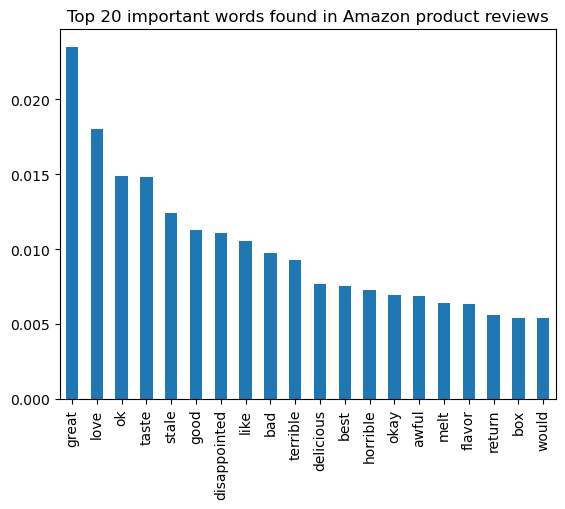

In [40]:
# show the 20 most important words
import matplotlib.pyplot as plt
%matplotlib inline

feature_imp = pd.Series(rf.feature_importances_, index = words.columns).sort_values(ascending = False) 
feature_imp.nlargest(20).plot(kind = 'bar')
plt.title("Top 20 important words found in Amazon product reviews")
plt.show()

**Finding 5:** Logistic regression gave the highest accuracy of 89.73%, followed by Random Forest with 88.73%, and Naive Bayesian with 86.94%. 

**Finding 6:** Keywords that are commonly mentioned in the reviews were mostly of positive sentiment with some negative ones. 

"_To avoid memory allocation in a Jupyter notebook, it's important to keep in mind that when a file is loaded and stored in a variable, the memory for that data will be allocated as long as the notebook is running and the variable exists. This is something to keep in mind when running programs in a Jupyter notebook._" 

"_- I attempted to compile the same code in a separate .py file and found that everything ran smoothly. I am obligated to use the Jupyter notebook as the primary development tool, as it is more suitable for the type of task at hand._"

"_- To avoid making changes, an engineer can simply close any unnecessary Chrome tabs and restart the kernel to begin anew._"

"_In case you are utilizing ipython/jupyter notebooks, it is advisable to ensure that only the current notebook is running. Additionally, make sure to close any other applications running simultaneously._" [[7]](https://copyprogramming.com/howto/jupyter-notebook-only-memory-error-same-code-run-in-a-conventional-py-and-works) 

In [42]:
import gc 
gc.collect()

4849